# DDRTree

**Created**: 19 November 2021

## Environment

In [1]:
if (!requireNamespace("viridis")) {
    install.packages("viridis")
}

if (!requireNamespace("DDRTree")) {
    install.packages("DDRTree")
}

if (!requireNamespace("dequer")) {
    install.packages("dequer")
}

if (!requireNamespace("patchwork")) {
    install.packages("devtools")
    devtools::install_github("thomasp85/patchwork")
}

if (!requireNamespace("Rcpp")) {
    install.packages("Rcpp")
}

Loading required namespace: viridis

Loading required namespace: DDRTree

also installing the dependency ‘irlba’


Loading required namespace: dequer

Loading required namespace: patchwork

Loading required namespace: Rcpp



In [3]:
library(tidyverse)
library(viridis)
library(RColorBrewer)
library(DDRTree)
library(dequer)
library(patchwork)
library(Rcpp)

setwd("~/eQTL_pQTL_Characterization/")

source("04_Expression/scripts/utils/ggplot_theme.R")

## Load Data

In [6]:
gene.exp <- read.table("/lustre/scratch119/humgen/projects/gains_team282/eqtl/data/logcpm_864_20412_hla.txt")

ga.prefix.filter <- grepl("GA", rownames(gene.exp))
rownames(gene.exp)[ga.prefix.filter] <- gsub("^GA", "", rownames(gene.exp)[ga.prefix.filter])

In [7]:
head(gene.exp)

,UK02270173_3,UK15130120_3,UK58000006_3,UK47010004_3,UK42020088_5,UK47490007_3,UK02770164_3,UK02770164_5,UK02630151_3,UK42150107_1,⋯,UK59070043_3,UK59070043_5,UK02510223_3,UK02XX0336_5,UK29090086_3,UK02XX0335_1,UK02XX0334_3,UK01210130_3,UK01210130_5,UK01380125_1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000230521,0.6644339,0.58271604,0.4046756,0.20905157,0.2211571,0.4288519,0.5133516,0.57768877,0.6990766,0.3812037,⋯,0.3823184,0.5423684,0.86762630,0.73833461,0.6461583,0.1227063,0.9621386,0.65838459,1.03561474,0.4457301
ENSG00000225864,0.9817872,0.43879936,0.6022344,0.92340489,0.2211571,1.1450686,0.1921362,0.57768877,0.1974851,1.2290495,⋯,0.6842527,0.8539227,0.91886777,0.12581620,0.5511865,0.4384007,0.5465139,0.40803066,0.46899151,0.3544115
ENSG00000227766,1.2117156,0.30682669,0.6625010,0.79963286,0.6445686,0.3130290,0.1183231,0.16750450,0.1505900,1.0533199,⋯,0.4901384,0.4340781,0.37504164,0.04316943,0.6151905,0.3406488,0.3147798,0.43511377,0.17382742,0.1157514
ENSG00000237669,0.6420763,0.69256830,0.9792012,0.69929584,0.3765156,1.0756817,0.8912050,0.60129641,0.8534668,1.0533199,⋯,1.0790156,0.6102946,1.03953331,0.97965846,0.7061683,0.7489857,0.7919934,0.85168813,0.69120049,1.0798771
ENSG00000271581,2.4744895,1.33153140,1.8310464,2.47531701,1.8812042,2.0531366,0.5972544,1.00686213,1.2811361,2.4244938,⋯,2.4728831,1.5338898,1.59080138,0.62923925,1.2804253,1.4727511,1.2187650,1.46471386,1.44139443,1.1896250
ENSG00000285647,0.0000000,0.03379072,0.0000000,0.05517067,0.6748270,0.0000000,0.0000000,0.03509293,0.6990766,1.6556266,⋯,3.4117627,2.4012963,0.04682116,0.00000000,0.0000000,0.4695662,0.3762952,0.07078527,0.07206309,0.4159282


In [8]:
eigengenes <- read.csv("~/gains_team282/nikhil/expression/gene_expression/eigengenes.csv", row.names=1)

In [9]:
head(eigengenes)

,ME_1,ME_2,ME_3,ME_4,ME_5,ME_6,ME_7,ME_8,ME_9,ME_10,⋯,ME_57,ME_58,ME_59,ME_60,ME_61,ME_62,ME_63,ME_64,ME_65,ME_66
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
UK02270173_3,-0.007334113,-0.012539535,0.019766245,0.002754747,0.017331897,-0.03308963,0.037551543,0.035526167,0.007061637,-0.045462098,⋯,-0.03736851,-0.015491299,-0.0003944539,0.011723160,0.02044694,0.036389792,-0.0199594898,-0.0137973687,-0.0226533146,-0.0224921394
UK15130120_3,-0.039218201,-0.028118430,-0.030119369,0.044385750,-0.035924531,-0.01776018,0.048988451,0.032309702,-0.025540316,-0.003352967,⋯,0.03449182,0.009217925,-0.0089077866,0.051934721,0.02981843,-0.012103471,0.0152503786,-0.0008924039,0.0005244192,0.0670088144
UK58000006_3,0.016278695,0.002300409,0.038062533,-0.019970003,0.035664412,-0.02460794,-0.013427286,0.025928161,0.019651683,-0.049510956,⋯,0.03616406,0.004048221,0.0298820001,-0.029996760,0.01875794,-0.009576244,-0.0324318003,0.0003237006,-0.0110317401,-0.0327675701
UK47010004_3,0.012015980,0.022969179,-0.004106886,-0.018628648,0.023430789,0.01904802,0.002796251,-0.011522015,-0.009007830,-0.001991980,⋯,0.02905445,-0.020687733,-0.0147508943,0.001036775,-0.01651732,0.030270486,-0.0053783817,0.0314069529,-0.0060826198,-0.0201014546
UK42020088_5,0.014862024,0.025478183,-0.004896746,-0.002020827,0.001845234,0.02344584,-0.004351176,-0.008517141,0.008746174,0.024165915,⋯,0.03286665,0.001720939,-0.0042298661,-0.010538437,-0.02148751,0.064750526,-0.0006839132,-0.0057871254,0.0119033593,0.0007013236
UK47490007_3,-0.018282178,0.014805866,-0.041274648,0.015737059,-0.004421347,0.03830728,0.003762546,-0.023246260,-0.045245113,0.030086125,⋯,0.02577557,-0.016313161,-0.0323697955,0.016932273,0.02380263,0.035666094,0.0028921852,0.0335825353,0.0320275167,-0.0150428658


In [10]:
sample.info <- read.table("/nfs/team282/data/gains_team282/Sample_info_864.txt")
ga.prefix.filter <- grepl("GA", sample.info$supplier_name)
sample.info$supplier_name[ga.prefix.filter] <- gsub("^GA", "", sample.info$supplier_name[ga.prefix.filter])
sample.info <- sample.info %>% 
  dplyr::filter(supplier_name %in% rownames(eigengenes))
rownames(sample.info) <- sample.info$supplier_name
sample.info <- sample.info[rownames(eigengenes),]

In [11]:
head(sample.info)

,manual_qc,id_study_lims,name,description,sanger_sample_id,supplier_name,last_updated,id_library_lims,id_pool_lims,id_iseq_flowcell_tmp,⋯,TIN.mean.,TIN.median.,TIN.stdev.,Concentration,num_samples_per_lane,SRSUnsup,globin_rate_fromcounts,PCOutlier,OtherOutlier,GAinSID
,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<lgl>,<lgl>,<chr>
UK02270173_3,1,5890,HG_The Genomic Advances in Sepsis (GAinS) RNA-seq,Total leukocyte RNA,gains8032857,UK02270173_3,2019-09-30 21:01:38,DN548016D,NT1557159B,6930558,⋯,69.51307,76.82800,23.72743,116.731,77,2,0.6790401,FALSE,FALSE,UK02270173
UK15130120_3,1,5890,HG_The Genomic Advances in Sepsis (GAinS) RNA-seq,Total leukocyte RNA,gains8032858,UK15130120_3,2019-09-30 21:01:38,DN548016D,NT1557159B,6930559,⋯,65.03706,71.49895,24.13243,76.185,77,2,0.6826886,FALSE,FALSE,UK15130120
UK58000006_3,1,5890,HG_The Genomic Advances in Sepsis (GAinS) RNA-seq,Total leukocyte RNA,gains8032859,UK58000006_3,2019-09-30 21:01:38,DN548016D,NT1557159B,6930560,⋯,70.85535,78.07773,23.24183,59.767,77,2,1.4290063,FALSE,FALSE,UK58000006
UK47010004_3,1,5890,HG_The Genomic Advances in Sepsis (GAinS) RNA-seq,Total leukocyte RNA,gains8032860,UK47010004_3,2019-09-30 21:01:38,DN548016D,NT1557159B,6930561,⋯,68.16224,75.05450,23.56361,105.000,77,1,0.9177558,FALSE,FALSE,UK47010004
UK42020088_5,1,5890,HG_The Genomic Advances in Sepsis (GAinS) RNA-seq,Total leukocyte RNA,gains8032861,UK42020088_5,2019-09-30 21:01:38,DN548016D,NT1557159B,6930562,⋯,64.67378,72.53810,26.03766,87.843,77,1,0.4031685,FALSE,FALSE,UK42020088
UK47490007_3,1,5890,HG_The Genomic Advances in Sepsis (GAinS) RNA-seq,Total leukocyte RNA,gains8032862,UK47490007_3,2019-09-30 21:01:38,DN548016D,NT1557159B,6930563,⋯,62.79935,68.60305,24.27960,67.484,77,2,1.1993500,FALSE,FALSE,UK47490007


In [12]:
associations <- read.csv("~/gains_team282/nikhil/expression/gene_expression/estimates.all.csv")

head(associations)

,Eigengene,Association.Variable,Association.Variable.Type,Statistic,Statistic.Type,P.Value,Adjusted.P.Value
,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
1,ME_7,Lymphocytes,Cell Proportion,0.7029755,Rho,2.043210e-125,4.045556e-123
2,ME_12,Lymphocytes,Cell Proportion,0.6783517,Rho,1.251588e-113,1.239072e-111
3,ME_8,Neutrophils,Cell Proportion,-0.6737926,Rho,1.426392e-111,9.414190e-110
4,ME_2,Neutrophils,Cell Proportion,0.6684208,Rho,3.393867e-109,1.679964e-107
5,ME_7,Neutrophils,Cell Proportion,-0.6660652,Rho,3.606687e-108,1.428248e-106
6,ME_6,Neutrophils,Cell Proportion,0.6575667,Rho,1.525618e-104,5.034541e-103


## DDRTree Algorithm

DDRTree is a dimensionality reduction algorithm used by Monocle2 on single-cell data. However, the dimensionality reduction technique is [broadly applicable](https://dl.acm.org/doi/10.1145/2783258.2783309). The algorithm assumes an underlying tree structure for the data. It performs a soft clustering of the data on $K$ centroids where $K<N$. A tree is then learned on these $K$ centroids.

This algorithm is implemented in the `DDRTree` R package. The algorithm returns the following variables:

1. $\mathbf{Z} \in \mathbb{R}_{d\times N}$ - A matrix of $N$ points representing the samples in the latent graph space.
2. $\mathbf{Y} \in \mathbb{R}_{d\times K}$ - A matrix of $K$ centroids in the latent graph space.
3. $\mathbf{W} \in \mathbb{R}_{D\times d}$ - A matrix of orthogonal, $d$-dimensional vectors representing a mapping from the latent space (lower-dimensional graph space) to the higher-dimensional input space. That is, the algorithm learns a function $f(z_i) = \mathbf{W}z_i$ such that $f: \mathbb{R}^d \rightarrow \mathbb{R}^D$.
4. `stree` $\in \mathbb{R}_{K\times K}$ - A sparse matrix representing the adjacency matrix of the tree over the centroids $\mathbf{Y}$.

In this analysis, I ran DDRTree on both the full gene expression data and the eigengene expression data. I also use a subset of eigengenes specifically associated with time point. By default, the DDRTree algorithm assumes that $K=N$, thus creating a tree on $N$ vertices.

**Objective**

$$\min_{\mathbf{W},\mathbf{Z}, \mathbf{B}, \mathbf{Y}, \mathbf{R}} \sum_{i=1}^N || \mathbf{x}_i - \mathbf{W}\mathbf{z}_i ||^2 + \frac{\lambda}{2} \sum_{k,k'} b_{k,k'} || \mathbf{W}\mathbf{y}_{k} - \mathbf{W}\mathbf{y}_{k'} ||^2 + \gamma \left[ \sum_{k=1}^K \sum_{i=1}^N r_{i,k} || \mathbf{z}_i - \mathbf{y}_k ||^2 + \sigma \Omega(\mathbf{R}) \right]$$

such that

$$\mathbf{W}^T \mathbf{W} = \mathbf{I}_{d}$$

$$\mathbf{B}\in\mathcal{B}$$

$$\sum_{k=1}^K r_{i,k} = 1\,\forall i$$

$$r_{i,k} \geq 0\,\forall i\,\forall k$$

$$\Omega(\mathbf{R})=\sum_{k=1}^K \sum_{i=1}^N r_{i,k}\log r_{i,k}$$

**Algorithm Hyperparameters**

1. $\lambda$ - Regularization parameter for inverse graph embedding. A higher value will reduce the distance between adjacent centroids on the graph.
2. $\gamma$ - Regularization parameter for the soft $K$-means. A higher value will create tighter clusters of samples.
3. $\sigma$ - "Bandwidth" parameter. A higher value will result in "harder" assignments of samples to clusters.

### Full Gene Expression

In [14]:
if (!file.exists("~/gains_team282/nikhil/expression/gene_expression/ddr.tree.full.RDS")) {
    
    ddr.tree.full <- DDRTree(
        as.matrix(gene.exp), dimensions=2, verbose=TRUE
    )
    
    rownames(ddr.tree.full$Z) <- c("Comp1", "Comp2")
    colnames(ddr.tree.full$Z) <- colnames(gene.exp)
    
    rownames(ddr.tree.full$Y) <- c("Comp1", "Comp2")
    colnames(ddr.tree.full$Y) <- paste0("Centroid", 1:ncol(gene.exp))
    
    rownames(ddr.tree.full$W) <- rownames(gene.exp)
    colnames(ddr.tree.full$W) <- c("Comp1", "Comp2")
    
    ddr.tree.full$tree <- as.data.frame(summary(ddr.tree.full$stree)) %>%
        dplyr::select(I=i, J=j) %>%
        dplyr::filter(I != J & I < J) %>%
        dplyr::arrange(I, J) %>%
        dplyr::mutate(Centroid.I = colnames(ddr.tree.full$Y)[I], Centroid.J = colnames(ddr.tree.full$Y)[J])

    saveRDS(ddr.tree.full, "~/gains_team282/nikhil/expression/gene_expression/ddr.tree.full.RDS")
    
} else {
    
    ddr.tree.full <- readRDS("~/gains_team282/nikhil/expression/gene_expression/ddr.tree.full.RDS")
}

Mapping X
Mapping Z
Mapping Y
Mapping W
Mapping dimensions
Mapping maxIter
Mapping num_clusters
Mapping sigma
Mapping lambda
Mapping gamma
Mapping eps
************************************** 
Iteration: 0
updating weights in graph
Finding MST
Refreshing B matrix
   B : (864 x 864)
   distZY : (864 x 864)
   min_dist : (864 x 864)
distZY_minCoeff = 
   tmp_R : (864 x 864)
   R : (864 x 864)
   Gamma : (864 x 864)
   X : (20412 x 864)
   W : (20412 x 2)
   Z : (2 x 864)
   L : (864 x 864)
Checking termination criterion
Computing tmp
... stage 1
... stage 2
Pre-computing LLT analysis
tmp is (864x864), 3264 non-zero values
Computing LLT
tmp_dense 864x864) 
Computing Q 864x864) 
gamma: 10
   X_in : (20412 x 864)
   Q : (20412 x 864)
Computing W
Computing Z
Computing Y
************************************** 
Iteration: 1
updating weights in graph
Finding MST
Refreshing B matrix
   B : (864 x 864)
   distZY : (864 x 864)
   min_dist : (864 x 864)
distZY_minCoeff = 
   tmp_R : (864 x 864)
   R 

### Eigengene Expression

In [15]:
ddr.tree.eigen <- DDRTree(
    as.matrix(t(eigengenes)), dimensions=2, verbose=FALSE, sigma=0.001, param.gamma=5
)

rownames(ddr.tree.eigen$Z) <- c("Comp1", "Comp2")
colnames(ddr.tree.eigen$Z) <- rownames(eigengenes)

rownames(ddr.tree.eigen$Y) <- c("Comp1", "Comp2")
colnames(ddr.tree.eigen$Y) <- paste0("Centroid", 1:nrow(eigengenes))

rownames(ddr.tree.eigen$W) <- colnames(eigengenes)
colnames(ddr.tree.eigen$W) <- c("Comp1", "Comp2")

ddr.tree.eigen$tree <- as.data.frame(summary(ddr.tree.eigen$stree)) %>%
    dplyr::select(I=i, J=j) %>%
    dplyr::filter(I != J & I < J) %>%
    dplyr::arrange(I, J) %>%
    dplyr::mutate(Centroid.I = colnames(ddr.tree.eigen$Y)[I], Centroid.J = colnames(ddr.tree.eigen$Y)[J])

saveRDS(ddr.tree.eigen, "~/gains_team282/nikhil/expression/gene_expression/ddr.tree.eigengenes.RDS")

### Eigengenes Associated with Time Point

In [16]:
time.point.eigens <- associations %>%
    dplyr::filter(Association.Variable.Type=="Time Point") %>%
    dplyr::arrange(desc(abs(Statistic))) %>%
    head(n=10)

time.point.eigengenes <- eigengenes[,time.point.eigens$Eigengene]

head(time.point.eigengenes)

,ME_2,ME_1,ME_50,ME_11,ME_48,ME_51,ME_58,ME_8,ME_21,ME_19
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
UK02270173_3,-0.012539535,-0.007334113,0.0004439112,-0.045429189,-0.014991051,-0.025053268,-0.015491299,0.035526167,0.018223203,-0.007399031
UK15130120_3,-0.028118430,-0.039218201,0.0257973439,-0.025889489,-0.034796340,-0.040197446,0.009217925,0.032309702,0.042207515,-0.009316094
UK58000006_3,0.002300409,0.016278695,-0.0241652372,-0.028758381,0.008844038,0.007794789,0.004048221,0.025928161,0.002048801,-0.017918711
UK47010004_3,0.022969179,0.012015980,-0.0025924850,0.004875559,0.003345371,-0.002693001,-0.020687733,-0.011522015,-0.011412941,0.013156810
UK42020088_5,0.025478183,0.014862024,0.0004594331,0.031423279,-0.006255216,-0.004150306,0.001720939,-0.008517141,-0.003446730,-0.011510826
UK47490007_3,0.014805866,-0.018282178,-0.0106050175,-0.001791188,0.012448730,-0.011349851,-0.016313161,-0.023246260,0.004460300,-0.039986015


In [17]:
ddr.tree.eigen.time.point <- DDRTree(
    as.matrix(t(time.point.eigengenes)), dimensions=2, verbose=FALSE, sigma=0.001, param.gamma=2
)

rownames(ddr.tree.eigen.time.point$Z) <- c("Comp1", "Comp2")
colnames(ddr.tree.eigen.time.point$Z) <- rownames(time.point.eigengenes)

rownames(ddr.tree.eigen.time.point$Y) <- c("Comp1", "Comp2")
colnames(ddr.tree.eigen.time.point$Y) <- paste0("Centroid", 1:nrow(time.point.eigengenes))

rownames(ddr.tree.eigen.time.point$W) <- colnames(time.point.eigengenes)
colnames(ddr.tree.eigen.time.point$W) <- c("Comp1", "Comp2")

ddr.tree.eigen.time.point$tree <- as.data.frame(summary(ddr.tree.eigen.time.point$stree)) %>%
    dplyr::select(I=i, J=j) %>%
    dplyr::filter(I != J & I < J) %>%
    dplyr::arrange(I, J) %>%
    dplyr::mutate(Centroid.I = colnames(ddr.tree.eigen.time.point$Y)[I], Centroid.J = colnames(ddr.tree.eigen.time.point$Y)[J])

saveRDS(ddr.tree.eigen.time.point, "~/gains_team282/nikhil/expression/gene_expression/ddr.tree.eigengenes.time.point.RDS")

## Identify Branches of the Trees

The tree is a graph $G=(V,E)$ with a set of vertices $V$ and a set of undirected edges $E$. Based on the construction of the tree, we know that $|V|=K=N$. Furthermore, one of the property of trees is that $|E|=|V|-1$.

We can use a depth-first search (DFS) to identify branches in the tree. Without loss of generality, we can start at any leaf node $v^* \in V$ and traverse over the centroids. Each time we arrive at a branch point $v_i$ where $\deg(v_i)>2$, we will start assigning the vertices to a new branch.

In [18]:
Rcpp::sourceCpp("04_Expression/scripts/utils/tree_dfs.cpp")

In [19]:
tree.branches <- tree_dfs(as.matrix(ddr.tree.full$tree[,1:2]) - 1)

ddr.tree.full.branches <- cbind(as.data.frame(t(ddr.tree.full$Y)), tree.branches) %>%
    dplyr::select(Tree.Branch=tree.branches) %>%
    dplyr::mutate(Branch.Degree=ifelse(Tree.Branch < 0, abs(Tree.Branch), NA)) %>%
    dplyr::mutate(Tree.Branch=ifelse(Tree.Branch >= 0, Tree.Branch, NA))

head(ddr.tree.full.branches)

,Tree.Branch,Branch.Degree
,<dbl>,<dbl>
Centroid1,9,NA
Centroid2,14,NA
Centroid3,1,NA
Centroid4,6,NA
Centroid5,1,NA
Centroid6,7,NA


In [20]:
saveRDS(ddr.tree.full.branches, "~/gains_team282/nikhil/expression/gene_expression/ddr.tree.full.branches.RDS")

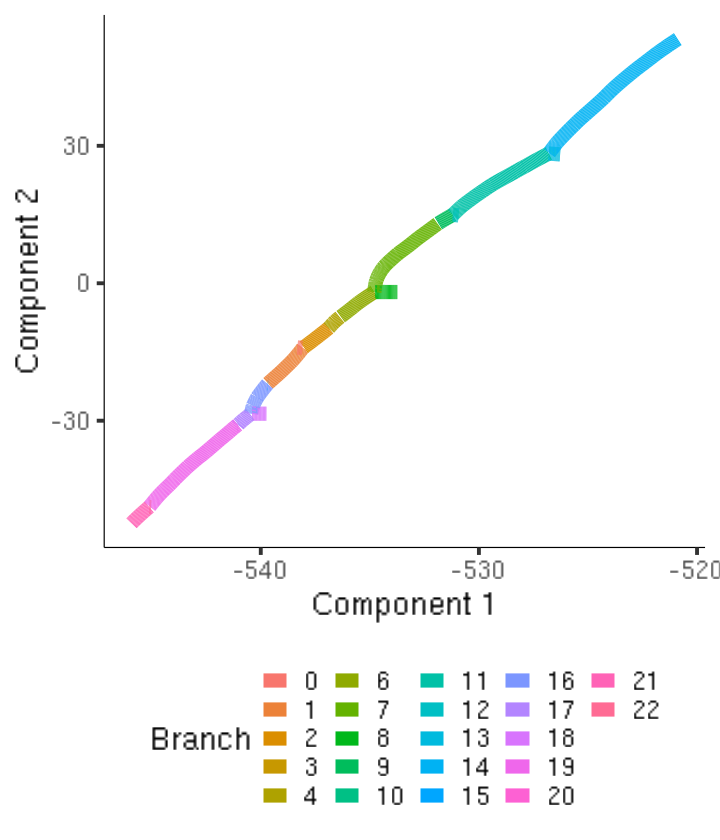

In [21]:
options(repr.plot.width=6, repr.plot.height=7)
merge(ddr.tree.full$tree, t(ddr.tree.full$Y), by.x="Centroid.I", by.y=0, all.x=T) %>%
    merge(., t(ddr.tree.full$Y), by.x="Centroid.J", by.y=0, all.x=T) %>%
    merge(., ddr.tree.full.branches, by.x="Centroid.I", by.y=0, all.x=T) %>%
    dplyr::filter(!is.na(Tree.Branch)) %>%
    ggplot() +
    geom_segment(aes(x=Comp1.x, y=Comp2.x, xend=Comp1.y, yend=Comp2.y, color=factor(Tree.Branch)), size=I(3)) +
    labs(color="Branch") + xlab("Component 1") + ylab("Component 2") +
    ggplot_theme
ggsave("04_Expression/results/ddrtree_gene_expression_branch_assignment.svg", width=6, height=7)

In [22]:
tree.branches <- tree_dfs(as.matrix(ddr.tree.eigen$tree[,1:2]) - 1)

ddr.tree.eigen.branches <- cbind(as.data.frame(t(ddr.tree.eigen$Y)), tree.branches) %>%
    dplyr::select(Tree.Branch=tree.branches) %>%
    dplyr::mutate(Branch.Degree=ifelse(Tree.Branch < 0, abs(Tree.Branch), NA)) %>%
    dplyr::mutate(Tree.Branch=ifelse(Tree.Branch >= 0, Tree.Branch, NA))

head(ddr.tree.eigen.branches)

,Tree.Branch,Branch.Degree
,<dbl>,<dbl>
Centroid1,14,NA
Centroid2,6,NA
Centroid3,14,NA
Centroid4,13,NA
Centroid5,12,NA
Centroid6,11,NA


In [23]:
saveRDS(ddr.tree.eigen.branches, "~/gains_team282/nikhil/expression/gene_expression/ddr.tree.eigen.branches.RDS")

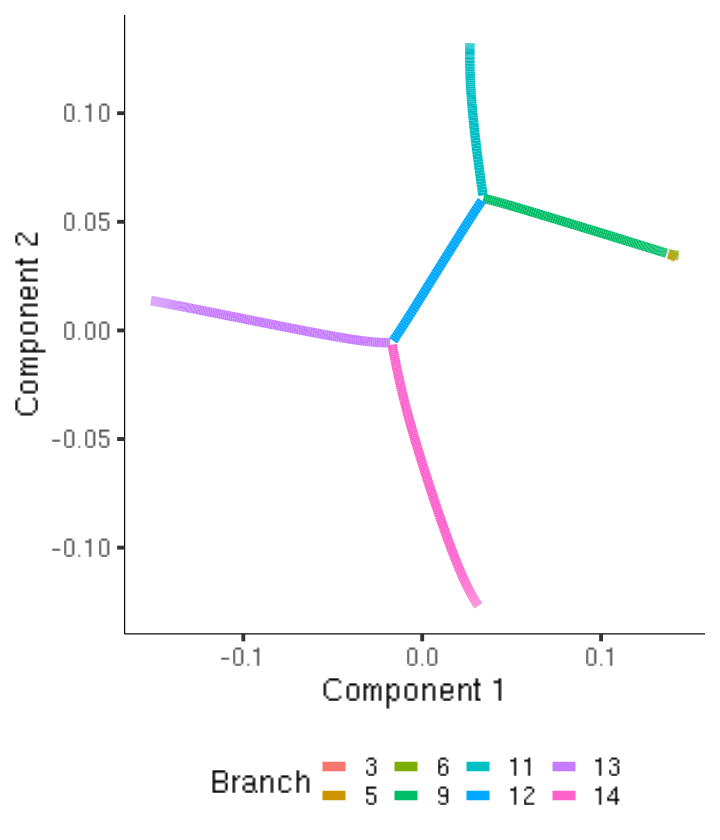

In [24]:
options(repr.plot.width=6, repr.plot.height=7)
merge(ddr.tree.eigen$tree, t(ddr.tree.eigen$Y), by.x="Centroid.I", by.y=0, all.x=T) %>%
    merge(., t(ddr.tree.eigen$Y), by.x="Centroid.J", by.y=0, all.x=T) %>%
    merge(., ddr.tree.eigen.branches, by.x="Centroid.I", by.y=0, all.x=T) %>%
    dplyr::filter(!is.na(Tree.Branch)) %>%
    ggplot() +
    geom_segment(aes(x=Comp1.x, y=Comp2.x, xend=Comp1.y, yend=Comp2.y, color=factor(Tree.Branch)), size=I(2)) +
    labs(color="Branch") + xlab("Component 1") + ylab("Component 2") +
    ggplot_theme
ggsave("04_Expression/results/ddrtree_eigengene_expression_branch_assignment.svg", width=6, height=7)

In [25]:
tree.branches <- tree_dfs(as.matrix(ddr.tree.eigen.time.point$tree[,1:2]) - 1)

ddr.tree.eigen.time.point.branches <- cbind(as.data.frame(t(ddr.tree.eigen.time.point$Y)), tree.branches) %>%
    dplyr::select(Tree.Branch=tree.branches) %>%
    dplyr::mutate(Branch.Degree=ifelse(Tree.Branch < 0, abs(Tree.Branch), NA)) %>%
    dplyr::mutate(Tree.Branch=ifelse(Tree.Branch >= 0, Tree.Branch, NA))

head(ddr.tree.eigen.time.point.branches)

,Tree.Branch,Branch.Degree
,<dbl>,<lgl>
Centroid1,0,NA
Centroid2,0,NA
Centroid3,0,NA
Centroid4,0,NA
Centroid5,0,NA
Centroid6,0,NA


In [26]:
saveRDS(ddr.tree.eigen.time.point.branches, "~/gains_team282/nikhil/expression/gene_expression/ddr.tree.eigen.time.point.branches.RDS")

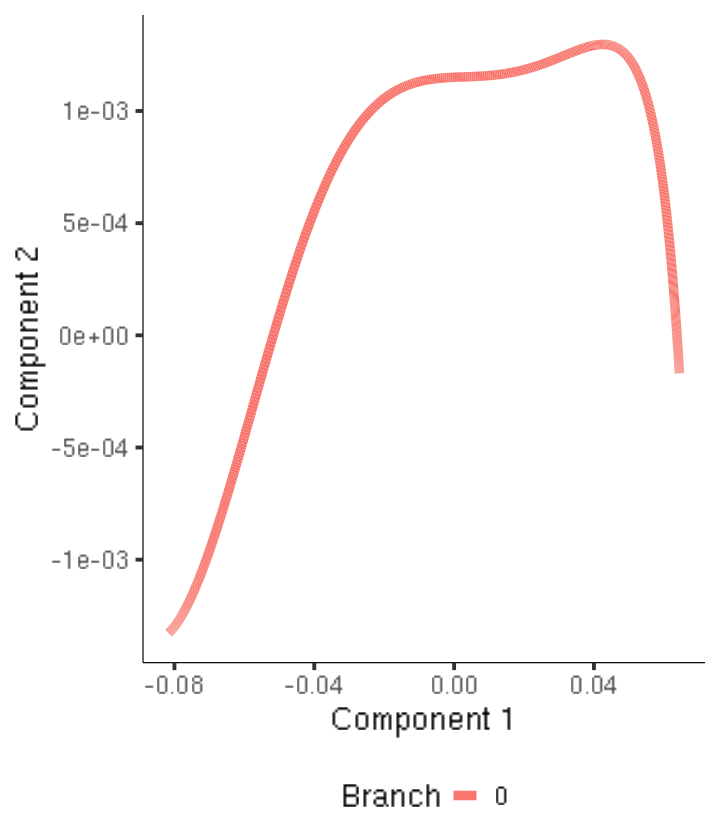

In [27]:
options(repr.plot.width=6, repr.plot.height=7)
merge(ddr.tree.eigen.time.point$tree, t(ddr.tree.eigen.time.point$Y), by.x="Centroid.I", by.y=0, all.x=T) %>%
    merge(., t(ddr.tree.eigen.time.point$Y), by.x="Centroid.J", by.y=0, all.x=T) %>%
    merge(., ddr.tree.eigen.time.point.branches, by.x="Centroid.I", by.y=0, all.x=T) %>%
    dplyr::filter(!is.na(Tree.Branch)) %>%
    ggplot() +
    geom_segment(aes(x=Comp1.x, y=Comp2.x, xend=Comp1.y, yend=Comp2.y, color=factor(Tree.Branch)), size=I(2)) +
    labs(color="Branch") + xlab("Component 1") + ylab("Component 2") +
    ggplot_theme
ggsave("04_Expression/results/ddrtree_eigengene_time_point_expression_branch_assignment.svg", width=6, height=7)

## Project Samples onto Tree

The $i$-th sample in the data will have a latent position $\mathbf{z}_i$. By projecting this point onto the tree, we can start calculating pseudotimes and also assign each sample to a branch.

The projection for a given sample's latent position $\mathbf{z}$ works as follows:

1. Identify the line segment formed by the tree over $\mathbf{Y}$ that is closest to $\mathbf{z}$. Let this segment be defined by points $\mathbf{a},\mathbf{b}\in\mathbf{Y}$.

For each segment from $\mathbf{a}$ to $\mathbf{b}$, we can calculate the minimum distance $d$ from the point $\mathbf{z}$ to the segment as

$$t=\frac{(\mathbf{z} - \mathbf{a})\cdot (\mathbf{b} - \mathbf{a})}{|\mathbf{b} - \mathbf{a}|^2}$$

$$d=\begin{cases}
\frac{|(\mathbf{z} - \mathbf{a})\times (\mathbf{z} - \mathbf{b})|}{|\mathbf{b} - \mathbf{a}|} & 0\leq t \leq 1\\
\min \{ |\mathbf{a} - \mathbf{z}|, |\mathbf{b} - \mathbf{z}| \} & t < 0, t > 1
\end{cases}$$

2. Project the vector $\mathbf{z}-\mathbf{a}$ onto $\mathbf{b}-\mathbf{a}$. That is, the projected point $\mathbf{z}^*$ is

$$\mathbf{z}^* = \mathbf{a} + (\mathbf{b} - \mathbf{a})t$$

In [28]:
Rcpp::sourceCpp("04_Expression/scripts/utils/tree_projection.cpp")

The projected points use 0-indexed values of the centroid. By construction, a point will be projected on a segment with two endpoints from the same branch, one endpoint from a branch and one endpoint that is a branch point, or two branch points.

In [29]:
full.projected = tree_projection(ddr.tree.full$Z, ddr.tree.full$Y, as.matrix(ddr.tree.full$tree[,1:2]) - 1)
colnames(full.projected) <- c("Proj.Comp1", "Proj.Comp2", "Centroid.I", "Centroid.J")

full.projected <- full.projected %>%
    as.data.frame() %>%
    dplyr::mutate(Centroid.I.Branch = ddr.tree.full.branches[Centroid.I + 1, "Tree.Branch"]) %>%
    dplyr::mutate(Centroid.J.Branch = ddr.tree.full.branches[Centroid.J + 1, "Tree.Branch"]) %>%
    dplyr::mutate(Projected.Branch = ifelse(is.na(Centroid.I.Branch), Centroid.J.Branch, Centroid.I.Branch)) %>%
    dplyr::select(Proj.Comp1, Proj.Comp2, Centroid.I, Centroid.J, Projected.Branch)

head(full.projected)

,Proj.Comp1,Proj.Comp2,Centroid.I,Centroid.J,Projected.Branch
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-530.6542,17.282666,393,450,11
2,-523.6047,43.479674,38,224,14
3,-537.4814,-12.010961,171,207,2
4,-536.6827,-8.692998,111,384,4
5,-538.4937,-13.973361,777,785,0
6,-532.8301,9.675803,258,746,7


In [30]:
saveRDS(full.projected, "~/gains_team282/nikhil/expression/gene_expression/ddr.tree.full.projected.RDS")

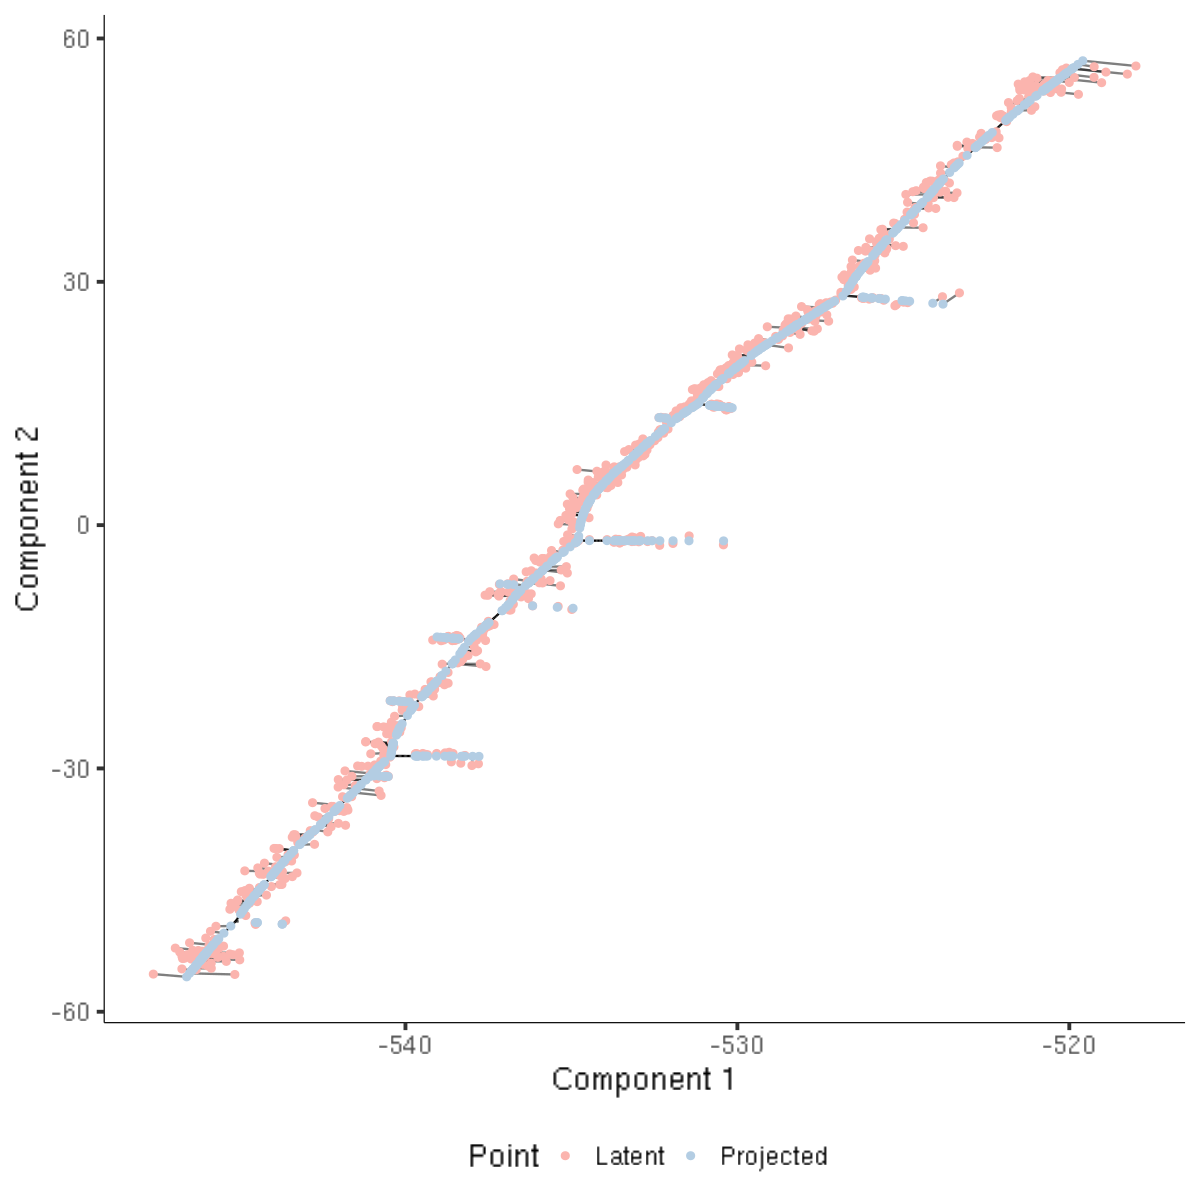

In [31]:
options(repr.plot.width=10, repr.plot.height=10)

tree.data <- merge(ddr.tree.full$tree, t(ddr.tree.full$Y), by.x="Centroid.I", by.y=0, all.x=T) %>%
    merge(., t(ddr.tree.full$Y), by.x="Centroid.J", by.y=0, all.x=T)

dplyr::bind_rows(
    t(ddr.tree.full$Z) %>%
        as.data.frame() %>%
        dplyr::mutate(Point="Latent") %>%
        dplyr::mutate(Sample=colnames(ddr.tree.full$Z)),
    full.projected %>%
        as.data.frame() %>%
        dplyr::select(Comp1=Proj.Comp1, Comp2=Proj.Comp2) %>%
        dplyr::mutate(Point="Projected") %>%
        dplyr::mutate(Sample=colnames(ddr.tree.full$Z))
) %>%
    ggplot(aes(x=Comp1, y=Comp2)) +
    geom_segment(data=tree.data, aes(x=Comp1.x, y=Comp2.x, xend=Comp1.y, yend=Comp2.y)) +
    geom_line(aes(group=Sample), alpha=0.5) +
    geom_point(aes(color=Point)) +
    scale_color_brewer(palette="Pastel1") +
    xlab("Component 1") + ylab("Component 2") +
    ggplot_theme
ggsave("04_Expression/results/ddrtree_gene_expression_projected_samples.svg", width=10, height=10)

The projected points use 0-indexed values of the centroid. By construction, a point will be projected on a segment with two endpoints from the same branch, one endpoint from a branch and one endpoint that is a branch point, or two branch points.

In [32]:
eigen.projected = tree_projection(ddr.tree.eigen$Z, ddr.tree.eigen$Y, as.matrix(ddr.tree.eigen$tree[,1:2]) - 1)
colnames(eigen.projected) <- c("Proj.Comp1", "Proj.Comp2", "Centroid.I", "Centroid.J")

eigen.projected <- eigen.projected %>%
    as.data.frame() %>%
    dplyr::mutate(Centroid.I.Branch = ddr.tree.eigen.branches[Centroid.I + 1, "Tree.Branch"]) %>%
    dplyr::mutate(Centroid.J.Branch = ddr.tree.eigen.branches[Centroid.J + 1, "Tree.Branch"]) %>%
    dplyr::mutate(Projected.Branch = ifelse(is.na(Centroid.I.Branch), Centroid.J.Branch, Centroid.I.Branch)) %>%
    dplyr::select(Proj.Comp1, Proj.Comp2, Centroid.I, Centroid.J, Projected.Branch)

head(eigen.projected)

,Proj.Comp1,Proj.Comp2,Centroid.I,Centroid.J,Projected.Branch
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.02856142,-0.123122728,57,557,14
2,0.15096297,0.029777812,426,432,5
3,0.02266148,-0.113444499,240,635,14
4,-0.12333625,0.009219194,157,803,13
5,-0.02452011,-0.005506231,700,802,13
6,0.02678090,0.117801739,336,748,11


In [33]:
saveRDS(eigen.projected, "~/gains_team282/nikhil/expression/gene_expression/ddr.tree.eigen.projected.RDS")

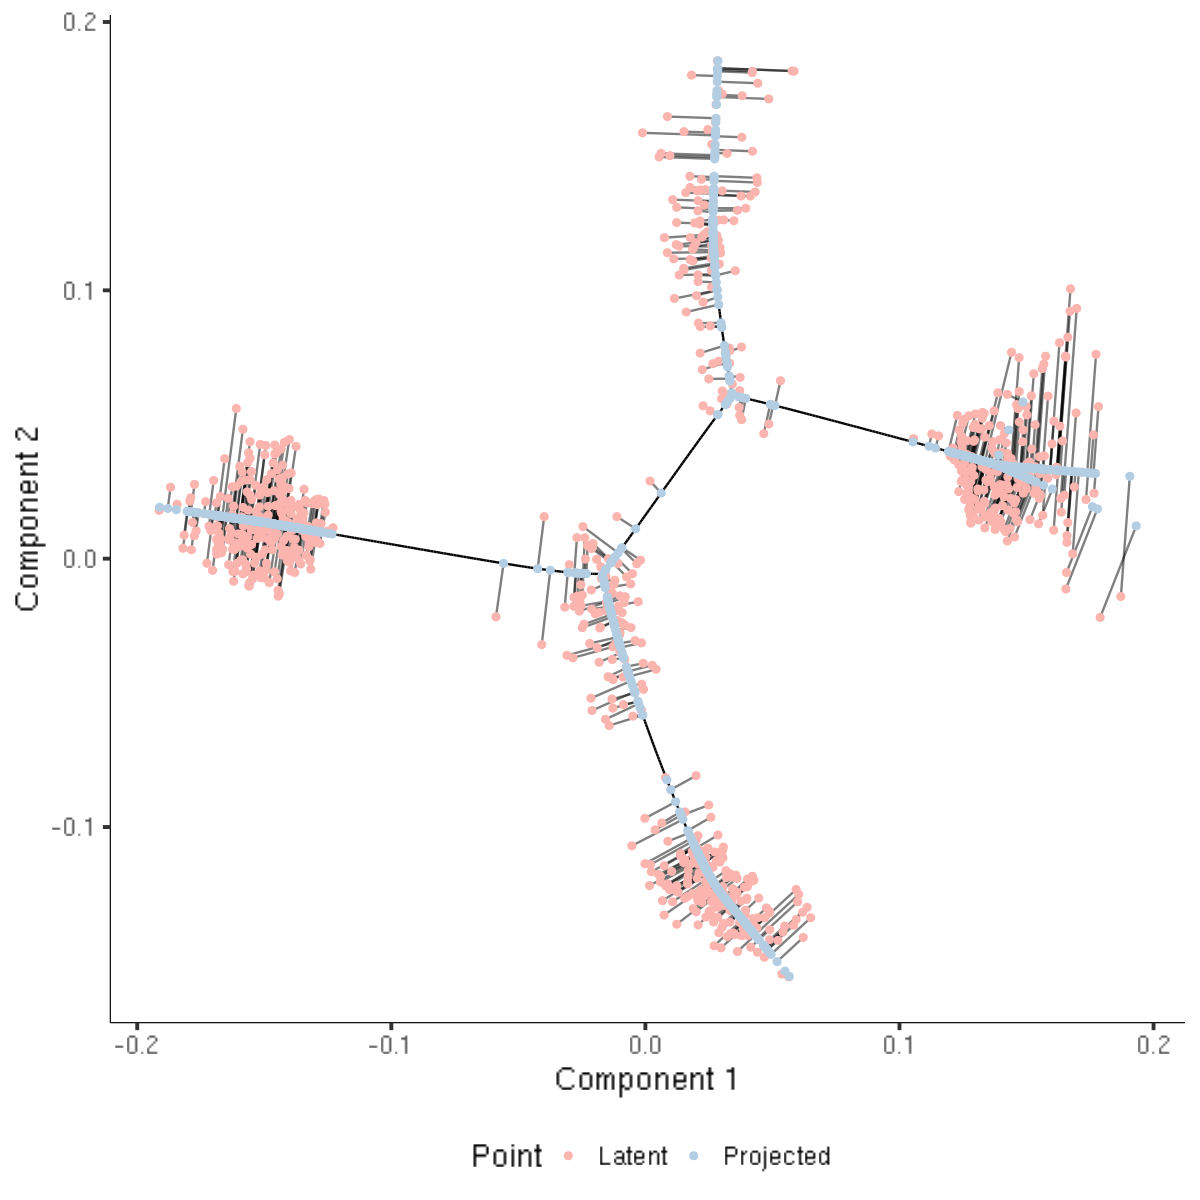

In [34]:
options(repr.plot.width=10, repr.plot.height=10)

tree.data <- merge(ddr.tree.eigen$tree, t(ddr.tree.eigen$Y), by.x="Centroid.I", by.y=0, all.x=T) %>%
    merge(., t(ddr.tree.eigen$Y), by.x="Centroid.J", by.y=0, all.x=T)

dplyr::bind_rows(
    t(ddr.tree.eigen$Z) %>%
        as.data.frame() %>%
        dplyr::mutate(Point="Latent") %>%
        dplyr::mutate(Sample=colnames(ddr.tree.eigen$Z)),
    eigen.projected %>%
        as.data.frame() %>%
        dplyr::select(Comp1=Proj.Comp1, Comp2=Proj.Comp2) %>%
        dplyr::mutate(Point="Projected") %>%
        dplyr::mutate(Sample=colnames(ddr.tree.eigen$Z))
) %>%
    ggplot(aes(x=Comp1, y=Comp2)) +
    geom_segment(data=tree.data, aes(x=Comp1.x, y=Comp2.x, xend=Comp1.y, yend=Comp2.y)) +
    geom_line(aes(group=Sample), alpha=0.5) +
    geom_point(aes(color=Point)) +
    scale_color_brewer(palette="Pastel1") +
    xlab("Component 1") + ylab("Component 2") +
    ggplot_theme
ggsave("04_Expression/results/ddrtree_eigengene_expression_projected_samples.svg", width=10, height=10)

The projected points use 0-indexed values of the centroid. By construction, a point will be projected on a segment with two endpoints from the same branch, one endpoint from a branch and one endpoint that is a branch point, or two branch points.

In [35]:
eigen.time.point.projected = tree_projection(ddr.tree.eigen.time.point$Z, ddr.tree.eigen.time.point$Y, as.matrix(ddr.tree.eigen.time.point$tree[,1:2]) - 1)
colnames(eigen.time.point.projected) <- c("Proj.Comp1", "Proj.Comp2", "Centroid.I", "Centroid.J")

eigen.time.point.projected <- eigen.time.point.projected %>%
    as.data.frame() %>%
    dplyr::mutate(Centroid.I.Branch = ddr.tree.eigen.time.point.branches[Centroid.I + 1, "Tree.Branch"]) %>%
    dplyr::mutate(Centroid.J.Branch = ddr.tree.eigen.time.point.branches[Centroid.J + 1, "Tree.Branch"]) %>%
    dplyr::mutate(Projected.Branch = ifelse(is.na(Centroid.I.Branch), Centroid.J.Branch, Centroid.I.Branch)) %>%
    dplyr::select(Proj.Comp1, Proj.Comp2, Centroid.I, Centroid.J, Projected.Branch)

head(eigen.time.point.projected)

,Proj.Comp1,Proj.Comp2,Centroid.I,Centroid.J,Projected.Branch
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.051983868,0.0011857149,705,727,0
2,0.066803083,-0.0007539833,436,437,0
3,-0.001594141,0.0011491102,384,423,0
4,-0.045143574,0.0003306847,106,403,0
5,-0.045730529,0.0003030549,354,504,0
6,-0.038218731,0.0006221099,119,236,0


In [36]:
saveRDS(eigen.time.point.projected, "~/gains_team282/nikhil/expression/gene_expression/ddr.tree.eigen.time.point.projected.RDS")

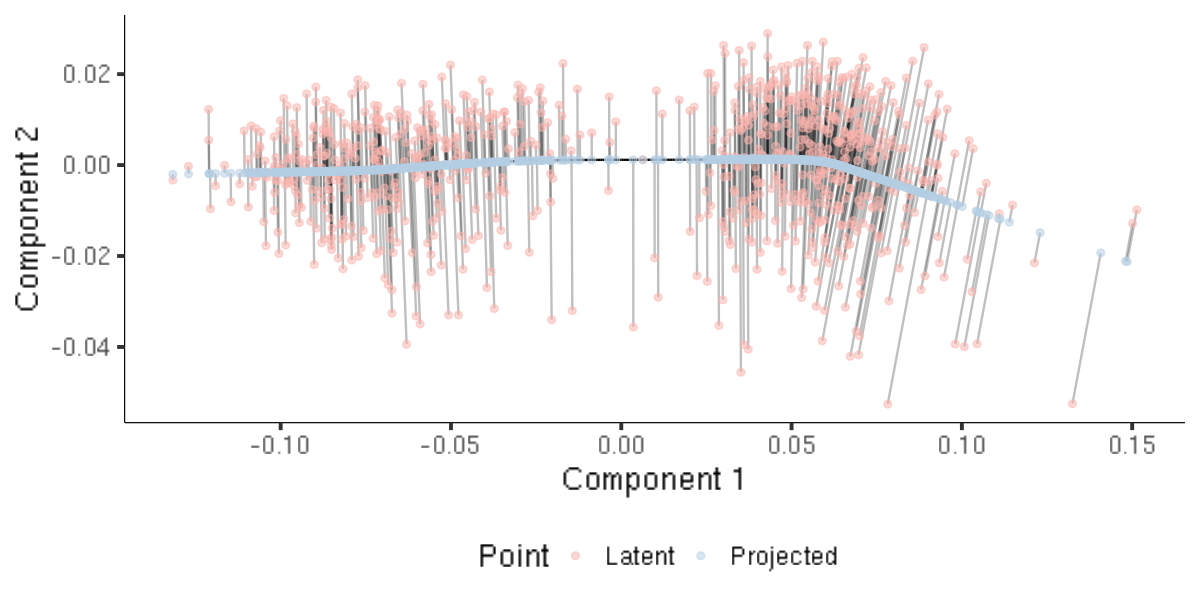

In [37]:
options(repr.plot.width=10, repr.plot.height=5)

tree.data <- merge(ddr.tree.eigen.time.point$tree, t(ddr.tree.eigen.time.point$Y), by.x="Centroid.I", by.y=0, all.x=T) %>%
    merge(., t(ddr.tree.eigen.time.point$Y), by.x="Centroid.J", by.y=0, all.x=T)

dplyr::bind_rows(
    t(ddr.tree.eigen.time.point$Z) %>%
        as.data.frame() %>%
        dplyr::mutate(Point="Latent") %>%
        dplyr::mutate(Sample=colnames(ddr.tree.eigen.time.point$Z)),
    eigen.time.point.projected %>%
        as.data.frame() %>%
        dplyr::select(Comp1=Proj.Comp1, Comp2=Proj.Comp2) %>%
        dplyr::mutate(Point="Projected") %>%
        dplyr::mutate(Sample=colnames(ddr.tree.eigen.time.point$Z))
) %>%
    ggplot(aes(x=Comp1, y=Comp2)) +
    geom_segment(data=tree.data, aes(x=Comp1.x, y=Comp2.x, xend=Comp1.y, yend=Comp2.y)) +
    geom_line(aes(group=Sample), alpha=0.25) +
    geom_point(aes(color=Point), alpha=0.5) +
    scale_color_brewer(palette="Pastel1") +
    xlab("Component 1") + ylab("Component 2") +
    ggplot_theme
ggsave("04_Expression/results/ddrtree_eigengene_time_point_expression_projected_samples.svg", width=10, height=10)

## Calculate Pseudotime

Identify a Minimum Spanning Tree (MST) on the Projected Points using Kruskal's Algorithm. Choose a root node. Perform a DFS from the root node, accruing the distances between projected points to assign pseudotime.

In [38]:
Rcpp::sourceCpp("04_Expression/scripts/utils/tree_pseudotime.cpp")

In [39]:
projected.distances <- as.matrix(dist(eigen.time.point.projected[,c("Proj.Comp1", "Proj.Comp2")]))

In [40]:
root.node <- which(eigen.time.point.projected$Proj.Comp1 == min(eigen.time.point.projected$Proj.Comp1)) - 1

In [41]:
pseudotime = tree_pseudotime(projected.distances, root.node)

In [42]:
pseudotime.mtx <- as.matrix(pseudotime)
rownames(pseudotime.mtx) <- rownames(eigengenes)
colnames(pseudotime.mtx) <- c("Pseudotime")

In [43]:
saveRDS(pseudotime.mtx, "~/gains_team282/nikhil/expression/gene_expression/eigen.time.point.pseudotime.RDS")

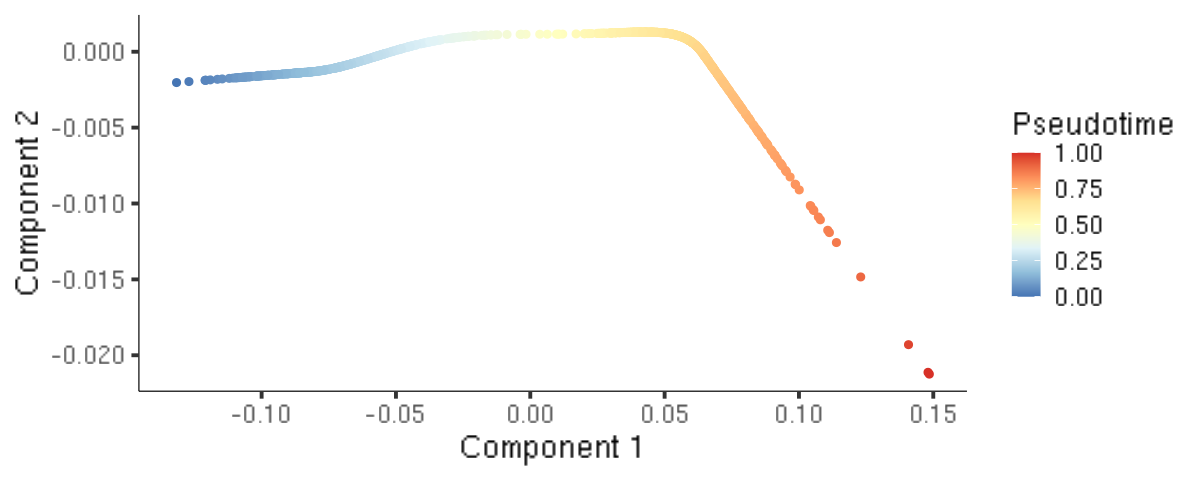

In [44]:
options(repr.plot.width=10, repr.plot.height=4)
cbind(eigen.time.point.projected, pseudotime.mtx) %>%
    as.data.frame() %>%
    ggplot() +
    geom_point(aes(x=Proj.Comp1, y=Proj.Comp2, color=Pseudotime)) +
    scale_color_distiller(palette="RdYlBu") +
    xlab("Component 1") + ylab("Component 2") +
    ggplot_theme +
    theme(legend.position="right")
ggsave("04_Expression/results/ddrtree_eigengene_trajectory_pseudotime.svg", width=10, height=4)